In [1]:
import os
import random
import pickle
import itertools
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
train_path = "train.tsv"
df = pd.read_csv(train_path, sep="\t")

# scoring

**we have 3 possible options**
>first take the max or min of the two

>second take the mean => this is better because it change our scoring distribution 
to not only be discreate 0, 1, 2, 3

In [3]:
df["score"] = df["Score1"].astype(float) + df["Score2"].astype(float)
df["score"] /=2.0

In [4]:
df.head()

,Id,EssaySet,Score1,Score2,EssayText,score
0,1,1,1,1,Some additional information that we would need...,1.0
1,2,1,1,1,"After reading the expirement, I realized that ...",1.0
2,3,1,1,1,"What you need is more trials, a control set up...",1.0
3,4,1,0,0,The student should list what rock is better an...,0.0
4,5,1,2,2,For the students to be able to make a replicat...,2.0


**then divide by the largest value to make it a percentage value**

In [5]:
for essay in range(10):
    div = df.query(f"EssaySet == {essay+1}")["Score1"].max()
    # divede score by max score
    df.loc[df["EssaySet"] == essay+1, "score"] /= div

In [6]:
df.head()

,Id,EssaySet,Score1,Score2,EssayText,score
0,1,1,1,1,Some additional information that we would need...,0.333333
1,2,1,1,1,"After reading the expirement, I realized that ...",0.333333
2,3,1,1,1,"What you need is more trials, a control set up...",0.333333
3,4,1,0,0,The student should list what rock is better an...,0.000000
4,5,1,2,2,For the students to be able to make a replicat...,0.666667


# add some gauusian niose

In [7]:
def generate_gaussian_params():
    mu = np.random.uniform(0,0.01)
    var = random.uniform(0,0.01)
    sigma = var ** 0.5
    return mu/2.0, sigma/2.0
def add_gaussian_noise(data: pd.Series, mean: float, sigma: float) -> pd.Series:
    data = data.astype(np.float32)
    gaussian = np.random.normal(loc=mean, scale = sigma, size = (data.shape[0],)).astype(np.float32)
    return data + gaussian

In [8]:
df["score_gn"] = df["Score1"].astype(float) + df["Score2"].astype(float)
df["score_gn"] /=2.0

In [9]:
df.head()

,Id,EssaySet,Score1,Score2,EssayText,score,score_gn
0,1,1,1,1,Some additional information that we would need...,0.333333,1.0
1,2,1,1,1,"After reading the expirement, I realized that ...",0.333333,1.0
2,3,1,1,1,"What you need is more trials, a control set up...",0.333333,1.0
3,4,1,0,0,The student should list what rock is better an...,0.000000,0.0
4,5,1,2,2,For the students to be able to make a replicat...,0.666667,2.0


In [10]:
for essay in range(10):
    data = df.query(f"EssaySet == {essay+1}")["Score1"]
    # add gaussian noise
    df.loc[df["EssaySet"] == essay+1, "score_gn"] = add_gaussian_noise(data, *generate_gaussian_params())
    div = data.max()
    # divede score by max score
    df.loc[df["EssaySet"] == essay+1, "score_gn"] /= div
    # what reached negative value make it 0
    df.loc[df["EssaySet"] == essay+1, "score_gn"] = df.loc[df["EssaySet"] == essay+1, "score_gn"].clip(lower=0) 
    # what become greater than 1 make it 1
    df.loc[df["EssaySet"] == essay+1, "score_gn"] = df.loc[df["EssaySet"] == essay+1, "score_gn"].clip(upper=1)

In [11]:
df.head()

,Id,EssaySet,Score1,Score2,EssayText,score,score_gn
0,1,1,1,1,Some additional information that we would need...,0.333333,0.343907
1,2,1,1,1,"After reading the expirement, I realized that ...",0.333333,0.340896
2,3,1,1,1,"What you need is more trials, a control set up...",0.333333,0.351329
3,4,1,0,0,The student should list what rock is better an...,0.000000,0.000000
4,5,1,2,2,For the students to be able to make a replicat...,0.666667,0.656207


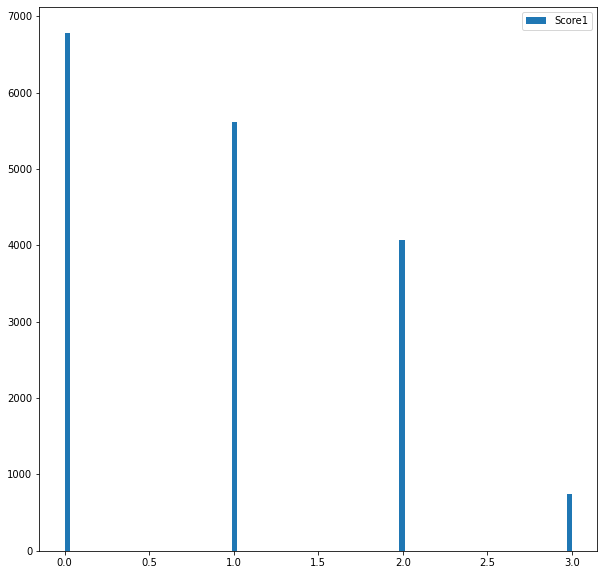

In [12]:
# plot distribution of Score1
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.hist(df["Score1"], bins=100, label="Score1")
ax.legend()
plt.show()

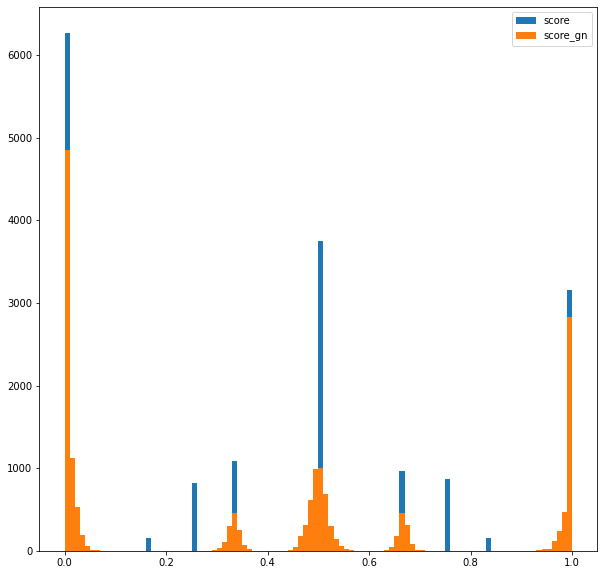

In [13]:
# plot distribution of score and score_gn
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.hist(df["score"], bins=100, label="score")
ax.hist(df["score_gn"], bins=100, label="score_gn")
ax.legend()
plt.show()

In [14]:
for essay in range(10):
    data = df.query(f"EssaySet == {essay+1}")["score_gn"]
    # add gaussian noise
    df.loc[df["EssaySet"] == essay+1, "score_gn_1"] = add_gaussian_noise(data, *generate_gaussian_params())
    div = data.max()
    # divede score by max score
    df.loc[df["EssaySet"] == essay+1, "score_gn_1"] /= div
    # what reached negative value make it 0
    df.loc[df["EssaySet"] == essay+1, "score_gn_1"] = df.loc[df["EssaySet"] == essay+1, "score_gn_1"].clip(lower=0) 
    # what become greater than 1 make it 1
    df.loc[df["EssaySet"] == essay+1, "score_gn_1"] = df.loc[df["EssaySet"] == essay+1, "score_gn_1"].clip(upper=1)


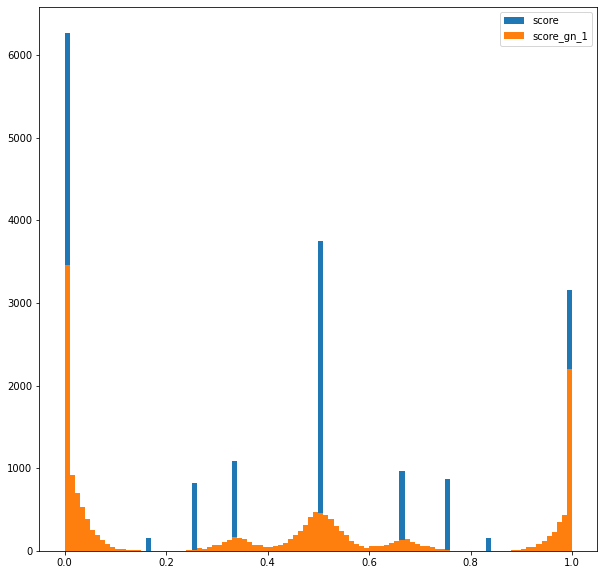

In [15]:
# plot distribution of score and score_gn
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.hist(df["score"], bins=100, label="score")
ax.hist(df["score_gn_1"], bins=100, label="score_gn_1")
ax.legend()
plt.show()

>**gaussian noise on the average score probabilty than Score 1 probabilty**

In [16]:
# save teh data set
df.to_csv("train_phase1.tsv", sep="\t")